          a0        a1  class
0    1.50000  0.000000      0
1    1.50973  0.028461      0
2    1.51892  0.057289      0
3    1.52755  0.086473      0
4    1.53562  0.116003      0
..       ...       ...    ...
995  6.42137 -0.606999      1
996  6.44165 -0.486611      1
997  6.45966 -0.365675      1
998  6.47540 -0.244232      1
999  6.48885 -0.122326      1

[1000 rows x 3 columns]


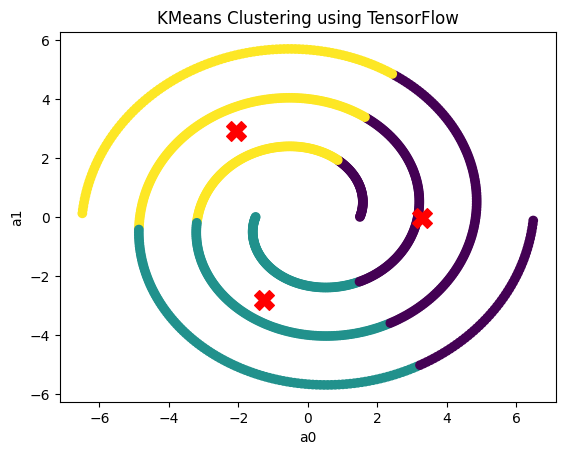

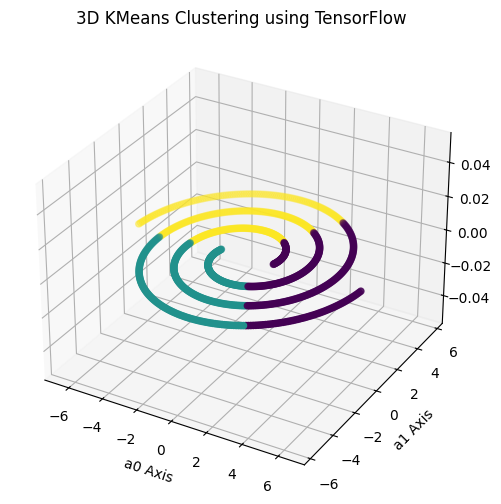

In [3]:
import tensorflow as tf
from sklearn.cluster import KMeans
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# بارگذاری داده‌ها
df = pd.read_csv(r'D:\Drive D\مجتمع فنی تهران\machine learning\ترم خودم\6\clusttering.exercise\2spiral.csv')
print(df)

# تعداد خوشه‌ها
k = 3
Xx = df[["a0", "a1"]].values

# تعداد نمونه‌ها و ویژگی‌ها
n_samples, n_features = Xx.shape

# تصادفی تعیین کردن مراکز اولیه
initial_centroids = Xx[np.random.choice(Xx.shape[0], k, replace=False)]

# تابع محاسبه فاصله اقلیدسی
def calculate_distance(X, centroids):
    return np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))

# انجام خوشه‌بندی
def kmeans(X, k, initial_centroids, max_iters=100):
    centroids = initial_centroids
    for _ in range(max_iters):
        # محاسبه فاصله از هر نمونه به مراکز خوشه‌ها
        distances = calculate_distance(X, centroids)
        
        # تعیین خوشه‌ها برای هر نقطه داده
        labels = np.argmin(distances, axis=0)
        
        # به‌روزرسانی مراکز خوشه‌ها
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
        
        if np.all(centroids == new_centroids):
            break
        
        centroids = new_centroids
    
    return labels, centroids

# اجرای الگوریتم KMeans
labels, centroids = kmeans(Xx, k, initial_centroids)

# نمایش نتایج
plt.scatter(df['a0'], df['a1'], c=labels, cmap='viridis')

# ترسیم مراکز خوشه‌ها
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200)

plt.title('KMeans Clustering using TensorFlow')
plt.xlabel('a0')
plt.ylabel('a1')
plt.show()

# 3D نمودار
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['a0'], df['a1'], c=labels, cmap='viridis', marker='o')

ax.set_xlabel('a0 Axis')
ax.set_ylabel('a1 Axis')

ax.set_title('3D KMeans Clustering using TensorFlow')

plt.show()


we can not use DBSCAN